<div style="border: 6px solid #FFEE00; border-radius: 10px; padding: 10px; background-color: #001F2D; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h1 style="font-family: 'Arial', serif; color: #FFFF00; text-align: center;">Homework: Review of Regression and Starting Linear Algebra</h1>
</div>

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 1: Radial Basis Function Neural Networks</h2>
</div>

In this class we have seen curve smoothing (e.g., LOESS), finding trend lines, and regression. Another related idea is that of _interpolation_. Interpolation differs from the others in that the goal is to estimate values between the data points while always preserving the values at the data points. The data points are assumed to be error/noise free. 

Here is an example of interpolating many points with three different models. The simplest is linear: one draws a straight line between adjacent points. 

<img src="https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600108001315-TJ7TU69HSVHHTCDEHMQ3/Screen+Shot+2020-09-14+at+11.24.43+AM.png" alt="interp" style="width:30%; max-width: 100%; height:auto;">

Note that these interpolation models are polynomials, which is fairly common. You might have done this before; however, polynomials can have rather bad behavior in some cases. In this example, look at the interpolation between the right-most two points: do you trust those estimates? Polynomials also always go to infinity at large values of their argument (positive or negative), which means they will always behave badly outside of the range of the data. (Technically, this is _extrapolation_, but still something to be cautious of.) And, what if our data lives in $100$ dimensions? 

Another approach is the use of radial basis functions, which model the data as

$$y = \sum_d A_d e^{-(x - x_d)^2/2\sigma^2}.$$

We have seen these before in this course. (And, by the way, there are many slides on this that I didn't get to in the lecture on linear regression.) 

Consider a dataset with only two points: $(\pi/2,1)$ and $(3\pi/2,-1)$. The distance between these points is $\pi$, so let's take $\sigma = \pi/2$. Place the radial basis functions at the data points. 

Solve for the $\{A_d\}$, plot the data in the range $[0,2\pi]$, plot your result and plot $\sin(x)$. Does your model go perfectly through the data points?

_Hint:_ There are many ways to approach this, but to connect our linear regression derivation, I recommend first noting that for two data points we only have $A_1$ and $A_2$ and we can solve for these using simple algebra. Do that first. Then, with these expressions, insert the values for $x_d$ and $\sigma$ to get the $A$'s. You now have everything you need.  What would you do if you had three datapoints or more? 

## Solve for $\{A_d\}$

**Simplify Eqns: Point1**

$$
1 = A_1 \cdot e^{-\frac{\left(\frac{\pi}{2} - \frac{\pi}{2}\right)^2}{2\sigma^2}} + A_2 \cdot e^{-\frac{\left(\frac{\pi}{2} - \frac{3\pi}{2}\right)^2}{2\sigma^2}}
$$
$$
e^{-\frac{(0)^2}{2\sigma^2}} = e^0 = 1
$$
$$
e^{-\frac{(-\pi)^2}{2\left(\frac{\pi}{2}\right)^2}} = e^{-\frac{\pi^2}{2\cdot\frac{\pi^2}{4}}} = e^{-\frac{1}{2}}
$$
$$
1 = A_1 + A_2 \cdot e^{-\frac{1}{2}}
$$

**Point2**
$$
-1 = A_1 \cdot e^{-\frac{\left(\frac{3\pi}{2} - \frac{\pi}{2}\right)^2}{2\sigma^2}} + A_2 \cdot e^{-\frac{\left(\frac{3\pi}{2} - \frac{3\pi}{2}\right)^2}{2\sigma^2}}
$$
$$
e^{-\frac{\pi^2}{2\cdot\frac{\pi^2}{4}}} = e^{-\frac{1}{2}}
$$
$$
e^{-\frac{(0)^2}{2\sigma^2}} = e^0 = 1
$$
$$
-1 = A_1 \cdot e^{-\frac{1}{2}} + A_2
$$

## Solve Systems of Eqns:
    - treat constant exponential term as c
    - Solve for A1

$$
A_1 = 1 - A_2 \cdot c
$$

    - Substitute A1 into 2nd eqn
    - Solve for A2

$$
A_2 = \frac{-1 - c}{1 - c^2}
$$

**The RBF does not go perfectly through the data points. If there were 3 or more data points the problem would need to be formulated in matrix form.**



Solution for A1 : 2.5414940825367984 and A2 : -2.5414940825367984, 


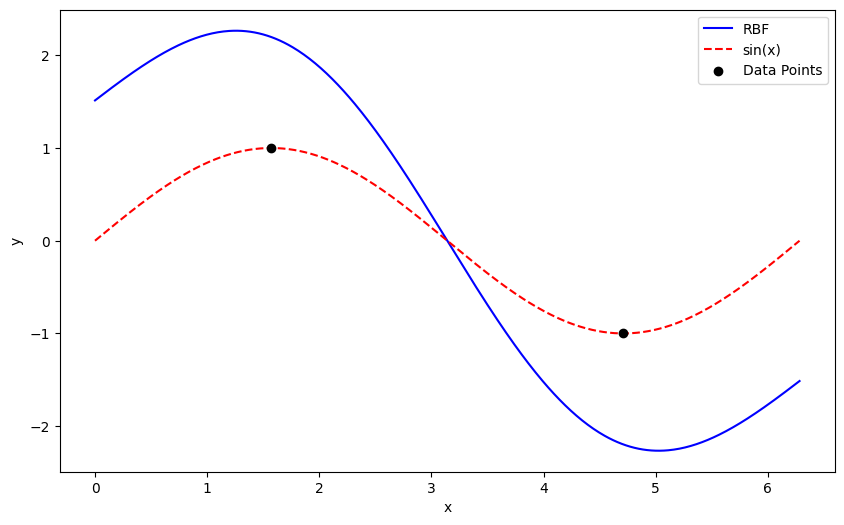

In [9]:
# Python implementation
import numpy as np
import matplotlib.pyplot as plt

# Using substitution to solve eqns above
e = np.exp(1)
c = e**(-1/2)
# Calculate A2
A2 = (-1 - c) / (1 - c**2)
# Calculate A1 
A1 = 1 - A2 * c


print('Solution for A1 : {} and A2 : {}, '.format(A1, A2))

# Given constants
sigma = np.pi / 2

# Points
x1, x2 = np.pi / 2, 3 * np.pi / 2

# Radial basis function with solved values for A1 and A2
def rbf_algebraic(x):
    return (A1 * np.exp(-((x - x1)**2) / (2 * sigma**2))) + (A2 * np.exp(-((x - x2)**2) / (2 * sigma**2)))

# Generate x over 0 to 2*pi
x_values = np.linspace(0, 2 * np.pi, 500)
# solve rbf for x
y_rbf = rbf_algebraic(x_values)
# sin(x) to compare
y_sin = np.sin(x_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_rbf, label='RBF', color='blue')
plt.plot(x_values, y_sin, label='sin(x)', color='red', linestyle='--')
plt.scatter([x1, x2], [1, -1], color='black', zorder=5, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 2: Regression with Two Features</h2>
</div>

In a previous HW you derived the equations for the slope and intercept for univariate linear regression, and connected the results to statistical properties of the data. Here, "univariate" refers to the fact that there was one variable, $x$, that represented some single feature. In this problem you are going to generalize this result to the multivariate case, but we are moving in baby steps so we'll only attempt the bivariate case. 

Consider a dataset with two features and we wish to make predictions using linear regression given some data on these two features. We take our model to be

$$y = w_1x_1 + w_2x_2.$$

There could be a bias term $w_0$ but we assume that a transformation has been carried to remove this bias. (In reality, I did this so that you only have two unknowns $w_1$ and $w_2$.) Here, $x_1$ is one of the features, such as height, and $x_2$ is a different feature, such as weight. This is a much more interesting and useful model!

Write down the loss function $L(w_1, w_2)$ for this case, assuming a mean-squared error (as we have mostly done so far in this course). Using partial derivatives, find the equations for the minimum and give explicit expressions for $w_1$ and $w_2$. Discuss how this case differs from the univariate case and what new statistical quantities have appeared.

Be sure to give **a lot** of mathematical detail using $\LaTeX$. Do not skip any steps. Add commentary on your steps. 

## Loss Function:
$$
L(w_1, w_2) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w_1 x_{1i} + w_2 x_{2i}) \right)^2
$$

### Solve for w1 minimum
$\frac{\partial L}{\partial w_1}$  
**Move constants and sums outside**  
$= \frac{1}{n}\sum_{i=1}^n \frac{\partial}{\partial w_1}[(y_i - (w_1x_{1i} + w_2x_{2i}))^2]$

**Apply chain rule where inner-function is term without square**  
$f(u) = (y_i - (w_1x_{1i} + w_2x_{2i}))$  
$= \frac{1}{n}\sum_{i=1}^n 2(y_i - (w_1x_{1i} + w_2x_{2i})) \cdot \frac{\partial}{\partial w_1}[-(w_1x_{1i} + w_2x_{2i})]$

**Partial deriv of outer function**  
$= \frac{1}{n}\sum_{i=1}^n 2(y_i - (w1x{1i} + w2x{2i})) \cdot (-x_{1i})$  

**Simplify**  
$\frac{\partial L}{\partial w_1} = -\frac{2}{n}\sum_{i=1}^n x_{1i}(y_i - (w_1x_{1i} + w_2x_{2i}))$

**Set equal to 0**  
$-\frac{2}{n}\sum_{i=1}^n x_{1i}(y_i - (w_1x_{1i} + w_2x_{2i})) = 0$  

**Drop Constant**  
$\sum_{i=1}^n x_{1i}(y_i - (w_1x_{1i} + w_2x_{2i})) = 0$  

**Distribute**  
$\sum_{i=1}^n (x_{1i}y_i - w_1x_{1i}^2 - w_2x_{1i}x_{2i}) = 0$  

**Split based on difference of sums**  
$\sum_{i=1}^n x_{1i}y_i - w_1\sum_{i=1}^n x_{1i}^2 - w_2\sum_{i=1}^n x_{1i}x_{2i} = 0$  

**Solve for w1**  
$w_1\sum_{i=1}^n x_{1i}^2 = \sum_{i=1}^n x_{1i}y_i - w_2\sum_{i=1}^n x_{1i}x_{2i}$  

$w_1 = \frac{\sum_{i=1}^n x_{1i}y_i - w_2\sum_{i=1}^n x_{1i}x_{2i}}{\sum_{i=1}^n x_{1i}^2}$

### Solve for w2 minimum:

**Similar to dL/dw1 but x2 gets moved out**  
$\frac{\partial L}{\partial w_2} = -\frac{2}{n}\sum_{i=1}^n x_{2i}(y_i - (w_1x_{1i} + w_2x_{2i})) = 0$  

**Drop distribute and split based on diff of sums**  
$\sum_{i=1}^n x_{2i}y_i - w_1\sum_{i=1}^n x_{1i}x_{2i} - w_2\sum_{i=1}^n x_{2i}^2 = 0$

**Solve for w2**  
$w_2 = \frac{\sum_{i=1}^n x_{2i}y_i - w_1\sum_{i=1}^n x_{1i}x_{2i}}{\sum_{i=1}^n x_{2i}^2}$

**Indeed the solutions for w1 and w2 are similar to the univariate case in some ways and diffferent in others. For one we are now left with a system of equations involving w1 and w2 which does not exist before. Before we saw that statistical quantities of the covariance between x and y and variance of x was considered but now we have to also take into account the covariance between our variables x1 and x2.**

$\sum_{i=1}^n x_{1i}^2$ : variance-like term for x₁  
$\sum_{i=1}^n x_{2i}^2$ : variance-like term for x₂  
$\sum_{i=1}^n x_{1i}x_{2i}$ : covariance-like term between x₁ and x₂  
$\sum_{i=1}^n x_{1i}y_i$ : covariance-like term between x₁ and y  
$\sum_{i=1}^n x_{2i}y_i$ : covariance-like term between x₂ and y  


**I used Claude 3.5 Sonnet on 10/27/24 to help write latex code.**


<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 3: Linear Algebra Preparation</h2>
</div>

In this problem you are going to explore multiplication. Do you know how to multiply? 

Let's keep it simple today and only talk about commutativty.  For example, is $3\cdot 4 = 4 \cdot 3$? Why or why not?

These rules, with associativity and distribution, are part of an algebra we define. And, you can invent your own! Sometimes we need to rethink these rules when new objects become useful. 

In data science, two objects of great use are vectors and matrices. These are like numbers but they package together a bunch of numbers together. This makes a lot of sense for data science where we almost always have a data sample with several features. For example, a person might have [age, height, salary, weight]. Or, we might think about this in terms of samples within a feature, such as [age1, age2, age3, ....], where agen is the age of person/sample n; organizing this way can be useful to computing statistics of the features. 

When we create these new mathematical objects, we need to rethink rules like commutativity. In fact, it is immediately obvious how to multiply something like [age, height, salary, weight]. How would you do this? For example, how would you square [age, height, salary, weight]? 

If you didn't come up with a good answer it is because there isn't one. In fact, there are two. In linear algebra, we will write these objects as vectors:
$${\bf v} = \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} $$
If you have encountered vectors before you might know of a rule to multiply them, which is to sum the squares of each entry. Let's make this more formal by defining the **inner product** as

$$\mathbf{v}^T \mathbf{v} =  \begin{pmatrix} age & height & salary & weight  \end{pmatrix}  \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} $$

where the **transpose** 

$${\bf v}^T = \begin{pmatrix} age & height & salary & weight  \end{pmatrix}$$

has been used. We can write this as ${\bf v}^T{\bf v}$. Our rule of multiplication is then: move entry by entry through ${\bf v}^T$ and ${\bf v}$ multipying each of the entries and adding those results as we go. Think of this rule: move across the columns of the left object as you move down the columns of the right object. Prove to yourself that this yields

$$ age^2  + height^2 +  salary^2 + weight^2 .$$

That is one way to multiply vectors! Now, here is the question: does this commute? That is, does ${\bf v}^T{\bf v} = {\bf v}{\bf v}^T$? What do you think? Let's look at what this means:

$$ \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} \begin{pmatrix} age & height & salary & weight  \end{pmatrix}  $$

Note that if we apply our column rule we will not get the same result! Multiplication of vectors does not commute! Too bad we spent our entire lives getting very comfortable with that rule! This case is referred to as the **outer product** and it plays an outsized role in data science. An outer product creates something new: a **matrix**. This is what it looks like:

$$
{\cal M} = \mathbf{v} \mathbf{v}^T = \begin{pmatrix} 
\text{age} \cdot \text{age} & \text{age} \cdot \text{height} & \text{age} \cdot \text{salary} & \text{age} \cdot \text{weight} \\
\text{height} \cdot \text{age} & \text{height} \cdot \text{height} & \text{height} \cdot \text{salary} & \text{height} \cdot \text{weight} \\
\text{salary} \cdot \text{age} & \text{salary} \cdot \text{height} & \text{salary} \cdot \text{salary} & \text{salary} \cdot \text{weight} \\
\text{weight} \cdot \text{age} & \text{weight} \cdot \text{height} & \text{weight} \cdot \text{salary} & \text{weight} \cdot \text{weight} \\
\end{pmatrix}
$$

This is a much larger object! Your task, using $\LaTeX$, figure out that mathematical rule that corresponds to "move entry by entry through ${\bf v}$ and ${\bf v}^T$ multipying each of the entries and adding those results as we go". That is, if we think of an element of ${\cal M}$ as ${\cal M}_{ij}$, where $i$ is the row and $j$ is the column, what is the inner product formula for an outer product? Use the result above to see the pattern. Imagine we need this formula so that can write a Python function that does this for us.

$${\cal M}_{ij} =  ???.$$

Later we will generalize this: if the outer product yields a matrix, then we will need to ask whether we can multiply matrices, whether that commutes and what the formula might be. But, that's for later....

____
${\cal M}_{ij} = v_i v_j$

where $v_i$ is the i-th element of v and $v_j$ is the j-th element of ${\bf v}^T$ so each entry of M is result of a product.


<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 4: Confounders and Linear Regression</h2>
</div>



Read Chapter 10 in your textbook and answer these questions in a markdown cell:

* What is a confounder?
  - **A confounder is a feature that meets 2 conditions. Firstly, it has an effect on the independent value. Secondly, it has an effect on the dependent value.**
  - **That is to say a counfounder causes a correlation between a treatment and an outcome.**
* What does it mean to control a confounder?
  - **Controlling means to find the relationship between two variables while holding the value of a 3rd variable constant.**
* How can linear regression be used for this? 
  - **Lin reg can be used to control a confounder by including the variable as a predictor in the model. Regression partitions out the effects of a variable while holding other variables constant.**
* Summarize in detail the section **The Anatomy of a Regression**.
  - **The key componenets of a regression are the outcome/dependent varaible/y, the treatment/independent variable and a set of control variables.**
  - **We are usually interested in something like how does the treatment variable affect the outcome variable? But also we want to control for potential confounders with the control variables.**
  - **These different components are captured in the eqn through the y value, X and beta matrices. There is no explicit mechanism that a reg eqn knows which columns of X and B are treatment and control variables. That comes from the researchers knowledge and specific questions.**
  - **We can ask how biased the estimate of the treatment effect would be if we don't control for confounders by fitting the regression with and without confounders and comparing how the effect of the treatment variable changes.**
* Is social media bad for you? 
  - **This section shows how controlling for confounders in a regression can still lead to over-estimating the true effect of a treatment. AKA including confounding factors in your regression is not a magic bullet.** 

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 5: Linear Algebra with Python</h2>
</div>



Next week we will start learning a bit on linear algebra. Linear algebra will seriously streamline everything we have done so far; for example, all of the problems above were designed as "two equations in two unknowns" to avoid linear algebra; once we have the linear algebra in place, we can not only handle all cases, but it will give us insights into the data we could not arrive at any other way.

It is useful to know how to do linear algebra in Python as well. Because linear algebra is so ubiquitous, it appears in numerous Python libraries. In this problem you will explore some of these so that you know where to find what you need. 

Using the internet, search for libraries and make a rough list of which libaries have linear algebra capabilities. For example, NumPy is [a very obvious example](https://numpy.org/doc/stable/reference/routines.linalg.html). My go-to for linear algebra is `linalg` in NumPy.  Note that there are many, many methods within this library - it is vast! What about Scipy? 

Write a list of some of the libraries you find. You will be using these libraries in the homework next week, mainly within `linalg`, so you might want to become familiar with that.

And, did you know you can do linear algebra **symbolically**? [Read this](https://docs.sympy.org/latest/modules/matrices/matrices.html). 

Here is an example you can play with:

In [8]:
from sympy import Matrix
A = Matrix([[1, 2], [3, 4]])
A_inv = A.inv()  # Symbolic inverse

print(f"\nMy matrix is: \n{A}.")
print(f"\nMy matrix has inverse: \n{A_inv}.")
print(f"\nWe can show this by multiplying them to get the identity: \n{A*A_inv}.")


My matrix is: 
Matrix([[1, 2], [3, 4]]).

My matrix has inverse: 
Matrix([[-2, 1], [3/2, -1/2]]).

We can show this by multiplying them to get the identity: 
Matrix([[1, 0], [0, 1]]).


What is beautiful about all of these libraries is that you can write very short codes to build your intuition and check your thinking. 

Next, use an AI (e.g., ChatGPT 4o) to organize all of this knowledge you just collected. Write a prompt that organizes what you found in a way that makes it very clear what is available to you. I'll give an example and then you do it your way. Put your table in a markdown cell below. 

_I would like to organize Python libraries in terms of their use for doing linear algebra operations. I would like to organize by their capability, speed, whether they are symbolic (as in sympy), whether they are built around a numerical library or something else (e.g., live within a machine learning ecosystem). I would like to have this organized as a table. Please produce the table in markdown so that I can copy and paste into a markdown cell in a Jupyter notebook. Finally, suggest one super interesting fact about the use of linear algebra in data scienceb._

**I asked Claude 3.5 Sonnet on 10/27/24 with a prompt similar to the above but I also added two columns to describe the documentation quality and API simplicity.**

| Library | Primary Focus | Speed | Symbolic | API Simplicity | Backend/Dependencies | Documentation Quality | Ecosystem | Notable Features |
|---------|--------------|-------|----------|----------------|---------------------|---------------------|------------|-----------------|
| NumPy | Numerical LA | Fast | No | Very Simple | Written in C | Excellent | Scientific Python | Core array operations, basic LA |
| SciPy.linalg | Advanced LA | Very Fast | No | Simple | BLAS/LAPACK | Excellent | Scientific Python | Specialized decompositions, sparse matrices |
| SymPy | Symbolic Math | Slow | Yes | Moderate | Pure Python | Good | Independent | Symbolic manipulation, proof assistance |
| PyTorch | Deep Learning LA | Very Fast | No | Simple | C++/CUDA | Excellent | ML/DL | GPU acceleration, autograd |
| JAX | Numerical Computing | Very Fast | No | Complex | XLA | Good | ML/Research | Function transformation, automatic differentiation |
| CuPy | GPU Computing | Extremely Fast | No | Simple | CUDA | Good | Scientific Python | Drop-in NumPy replacement for GPU |
| TensorFlow | Deep Learning LA | Very Fast | No | Complex | C++/CUDA | Excellent | ML/DL | Enterprise-scale deployment |
| Dask | Distributed LA | Fast | No | Moderate | NumPy/Pandas | Good | Data Science | Parallel computing, big data |
| petsc4py | Scientific Computing | Extremely Fast | No | Complex | PETSc | Moderate | HPC | Parallel sparse operations |